In [16]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [17]:
df = pd.read_excel('Cereals1.xls')
df

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
1,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
2,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
3,Almond_Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843
4,Apple_Cinnamon_Cheerios,G,C,110,2,2,180,1.5,10.5,10,70,25,1,1.0,0.75,29.509541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,Triples,G,C,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,39.106174
72,Trix,G,C,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,27.753301
73,Wheat_Chex,R,C,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,49.787445
74,Wheaties,G,C,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00,51.592193


In [18]:
df.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000
mean,107.368421,2.526316,1.013158,160.065789,2.048684,14.723684,6.934211,93.657895,28.289474,2.197368,1.030000,0.827500,42.327057
std,19.139378,1.089020,1.013159,84.318813,2.219038,4.160444,4.473136,68.502565,22.487813,0.832982,0.151438,0.227204,13.820602
min,50.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,132.500000,0.750000,12.000000,3.000000,40.000000,25.000000,1.000000,1.000000,0.670000,32.932466
50%,110.000000,2.500000,1.000000,180.000000,1.750000,14.500000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.253086
75%,110.000000,3.000000,2.000000,212.500000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.780847
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


In [21]:
df = df.replace(-1, df.mean(numeric_only=True))
df

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.000000,0,3,1.0,1.00,33.983679
1,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.000000,25,3,1.0,0.33,59.425505
2,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.000000,25,3,1.0,0.50,93.704912
3,Almond_Delight,R,C,110,2,2,200,1.0,14.0,8.0,93.657895,25,3,1.0,0.75,34.384843
4,Apple_Cinnamon_Cheerios,G,C,110,2,2,180,1.5,10.5,10.0,70.000000,25,1,1.0,0.75,29.509541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,Triples,G,C,110,2,1,250,0.0,21.0,3.0,60.000000,25,3,1.0,0.75,39.106174
72,Trix,G,C,110,1,1,140,0.0,13.0,12.0,25.000000,25,2,1.0,1.00,27.753301
73,Wheat_Chex,R,C,100,3,1,230,3.0,17.0,3.0,115.000000,25,1,1.0,0.67,49.787445
74,Wheaties,G,C,100,3,1,200,3.0,17.0,3.0,110.000000,25,1,1.0,1.00,51.592193


In [34]:
df.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000
mean,107.368421,2.526316,1.013158,160.065789,2.048684,14.930575,7.038608,96.148892,28.289474,2.197368,1.030000,0.827500,42.327057
std,19.139378,1.089020,1.013159,84.318813,2.219038,3.737575,4.377048,66.688658,22.487813,0.832982,0.151438,0.227204,13.820602
min,50.000000,1.000000,0.000000,0.000000,0.000000,7.000000,0.000000,15.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,132.500000,0.750000,12.000000,3.000000,43.750000,25.000000,1.000000,1.000000,0.670000,32.932466
50%,110.000000,2.500000,1.000000,180.000000,1.750000,14.861842,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.253086
75%,110.000000,3.000000,2.000000,212.500000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.780847
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


In [35]:
q1=df.quantile(0.25)
q3=df.quantile(0.75)
iqr=q3-q1
print(iqr)

calories    10.000000
protein      1.000000
fat          2.000000
sodium      80.000000
fiber        2.250000
carbo        5.000000
sugars       8.000000
potass      76.250000
vitamins     0.000000
shelf        2.000000
weight       0.000000
cups         0.330000
rating      17.848381
dtype: float64


In [36]:

df.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000
mean,107.368421,2.526316,1.013158,160.065789,2.048684,14.930575,7.038608,96.148892,28.289474,2.197368,1.030000,0.827500,42.327057
std,19.139378,1.089020,1.013159,84.318813,2.219038,3.737575,4.377048,66.688658,22.487813,0.832982,0.151438,0.227204,13.820602
min,50.000000,1.000000,0.000000,0.000000,0.000000,7.000000,0.000000,15.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,132.500000,0.750000,12.000000,3.000000,43.750000,25.000000,1.000000,1.000000,0.670000,32.932466
50%,110.000000,2.500000,1.000000,180.000000,1.750000,14.861842,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.253086
75%,110.000000,3.000000,2.000000,212.500000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.780847
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


In [37]:
pd.crosstab(df.type, df.mfr)

mfr,A,G,K,N,P,Q,R
type,,,,,,,
C,0,22,23,4,9,7,8
H,1,0,0,1,0,1,0


In [38]:
print("Cereal with the best rating: ", df["rating"].idxmax())
print("Cereal with the worst rating: ", df["rating"].idxmin())

Cereal with the best rating:  2
Cereal with the worst rating:  9


<AxesSubplot:xlabel='type', ylabel='rating'>

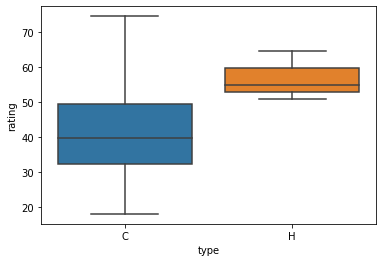

In [27]:
sns.boxplot(x = "type", y = "rating", data = df, showfliers = False)
# Removed the outliers from the graph

A


In [28]:
data = df[['sugars', 'calories', 'carbo', 'fat']]
data.corr()

,sugars,calories,carbo,fat
sugars,1.000000,0.574304,-0.501056,0.300349
calories,0.574304,1.000000,0.207615,0.510630
carbo,-0.501056,0.207615,1.000000,-0.312341
fat,0.300349,0.510630,-0.312341,1.000000


In [29]:
df["mfr"][df["calories"].idxmax()]

'K'

In [30]:
print("Correlation between calories and consumer rating is: ",df['calories'].corr(df['rating']))

Correlation between calories and consumer rating is:  -0.6743360496799723


<AxesSubplot:xlabel='calories', ylabel='rating'>

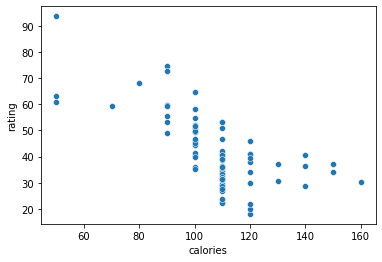

In [31]:
sns.scatterplot(data = df, x = "calories", y = "rating")

In [32]:
print("Correlation between shelf and consumer rating is: ",df['shelf'].corr(df['rating']))

Correlation between shelf and consumer rating is:  0.0019730207509652386


<AxesSubplot:xlabel='shelf', ylabel='rating'>

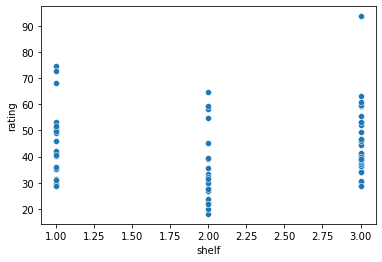

In [33]:
sns.scatterplot(data = df, x = "shelf", y = "rating")